# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [186]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [187]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head(10)


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


## Deliverable 1: Get a Summary DataFrame 

In [188]:
#  1. Get the total rides for each city type
ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [189]:
# 2. Get the total drivers for each city type
driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [190]:
#  3. Get the total amount of fares for each city type
sum_fare = pyber_data_df.groupby(["type"]).sum()["fare"] 
sum_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [191]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride = sum_fare / ride_count
average_fare_per_ride 

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [192]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = sum_fare / driver_count
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [193]:
#  6. Create a PyBer summary DataFrame. 
Pyber_summmary_df = pd.DataFrame({"Total Rides" : ride_count,
                                    "Total Drivers" : driver_count,
                                     "Total Fare" : sum_fare, 
                                     "Average Fare per Ride": average_fare_per_ride,
                                     "Arage Fare per Driver" : average_fare_per_driver})                           

Pyber_summmary_df



,Total Rides,Total Drivers,Total Fare,Average Fare per Ride,Arage Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [194]:
#  7. Cleaning up the DataFrame. Delete the index name
Pyber_summmary_df.index.name = None

In [195]:
#  8. Format the columns.
Pyber_summmary_df["Total Rides"] = Pyber_summmary_df["Total Rides"].map("{:,}".format)
Pyber_summmary_df["Total Drivers"] = Pyber_summmary_df["Total Drivers"].map("{:,}".format)
Pyber_summmary_df["Total Fare"] = Pyber_summmary_df["Total Fare"].map("${:,.2f}".format)
Pyber_summmary_df["Average Fare per Ride"] = Pyber_summmary_df["Average Fare per Ride"].map("${:,.2f}".format)
Pyber_summmary_df["Arage Fare per Driver"] = Pyber_summmary_df["Arage Fare per Driver"].map("${:,.2f}".format)
Pyber_summmary_df

,Total Rides,Total Drivers,Total Fare,Average Fare per Ride,Arage Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [196]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [197]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fair_each_day = pyber_data_df.groupby(["type","date"]).sum()["fare"]
fair_each_day

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [198]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fair_each_day = fair_each_day.reset_index()
fair_each_day.head()

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [199]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_each_type_pivot = fair_each_day.pivot(index = "date", columns ='type', values='fare')
fare_each_type_pivot.tail()

type,Rural,Suburban,Urban
date,,,
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55
2019-05-08 11:38:35,NaN,NaN,19.77
2019-05-08 13:10:18,NaN,NaN,18.04


In [200]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
import numpy as np

fare_each_type_loc = fare_each_type_pivot.loc["2019-01-01" :"2019-04-28"]

fare_each_type_loc.tail()

type,Rural,Suburban,Urban
date,,,
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28
2019-04-27 23:26:03,NaN,NaN,19.06
2019-04-27 23:52:44,NaN,45.98,NaN


In [201]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
fare_each_type_loc.index = pd.to_datetime(fare_each_type_loc.index)

In [202]:
# 7. Check that the datatype for the index is datetime using df.info()
fare_each_type_loc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [203]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fare_weekly = fare_each_type_loc.resample("W").sum()
fare_weekly.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


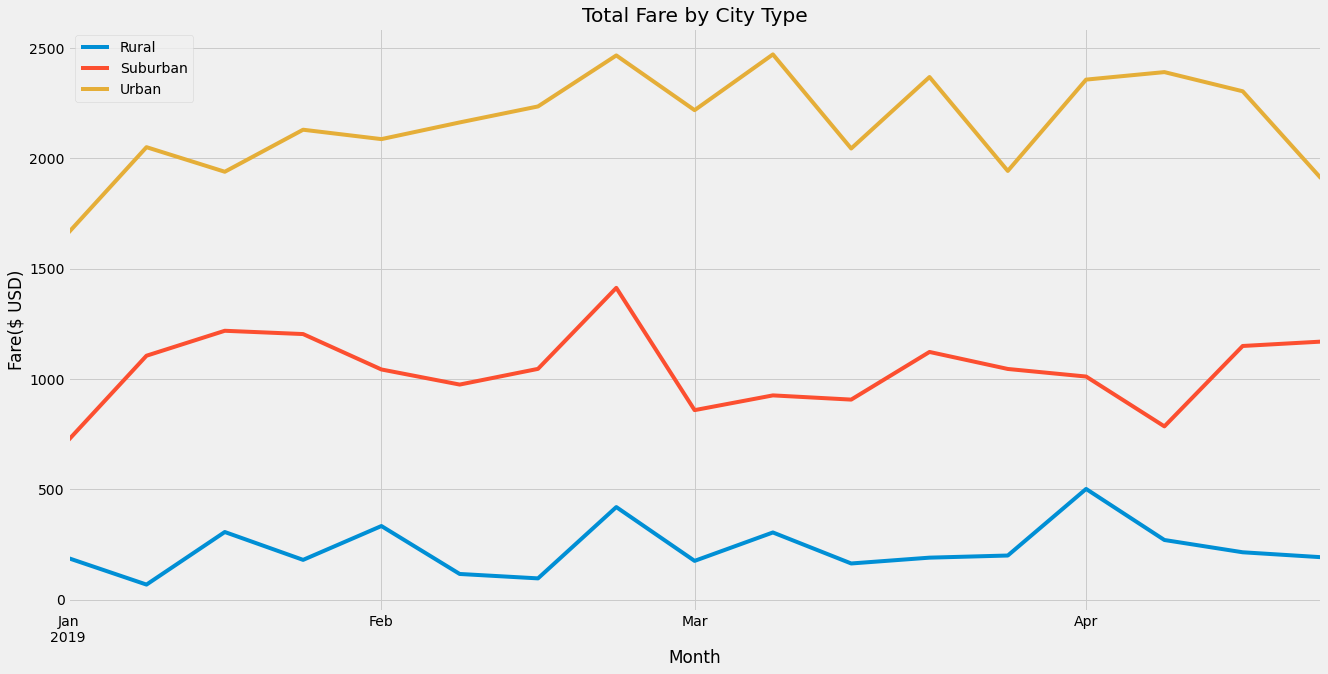

In [204]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
import numpy as np
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')


fare_weekly.plot(figsize=(20,10))
plt.ylabel("Fare($ USD)")
plt.xlabel("Month")
plt.title("Total Fare by City Type")

# Save Figure
plt.savefig("analysis/PyBer_fare_summary.png")
plt.legend()